# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
RANDOM_STATE = 83

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [3]:
#Creamos el dataframe
df = pd.read_csv("airbnb.csv")
df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


In [4]:
df['instant_bookable'].unique()

array([0, 1], dtype=int64)

In [5]:
df['entire_home'].unique()

array([1, 0], dtype=int64)

In [6]:
df['private_room'].unique()

array([0, 1], dtype=int64)

In [7]:
df['shared_room'].unique()

array([0, 1], dtype=int64)

In [8]:
df.dtypes

accommodates             int64
bathrooms              float64
bedrooms               float64
guests_included          int64
host_listings_count    float64
latitude               float64
longitude              float64
minimum_nights           int64
number_of_reviews        int64
distance_centre        float64
instant_bookable         int64
entire_home              int64
private_room             int64
shared_room              int64
price                  float64
dtype: object

Podemos suponer que las variables son:

-accommodates: número de personas que pueden alojarse.

-bathrooms: número de baños.

-bedrooms: número de dormitorios.

-guests_included: número de gente que hay actualmente viviendo en ese piso.

-host_listings_count: cantidad de pisos que dispone el anfitrión en alquiler.

-latitude y longitude: coordenadas del piso en alquiler.

-minimum_nights: mínimo número de noches a alojarse.

-number_of_reviews: cantidad de reviews que ha recibido el piso.

-distance_centre: distancia al centro (asumiremos km).

-instant_bookable: 1 si se puede alquilar actualmente o 0 si no.

-entire home: 1 si se dispone de toda la casa o 0 si no.

-private_room: 1 si se dispone de una habitación privada para cada inquilino o 0 si no.

-shared_room: 1 si se dispone de habitación compartida entre inquilinos o 0 si no.

-price: precio por noche.

Vamos ahora a ver los datos estadísticos relacionados con el precio:

In [9]:
df['price'].describe()

count    14998.000000
mean       130.050273
std         63.820328
min         19.000000
25%         89.000000
50%        115.000000
75%        150.000000
max        440.000000
Name: price, dtype: float64

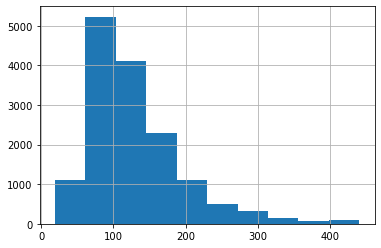

In [10]:
df['price'].hist()

Como vemos, los datos se mueven entre los 19 y los 440 euros, aunque tenemos una media de 130 euros por noche, además de que la mayoría de los datos se encuentran por encima de los 90 euros por noche, y solo el 25% de los datos superan los 150 euros.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001214607C580>,
      dtype=object)

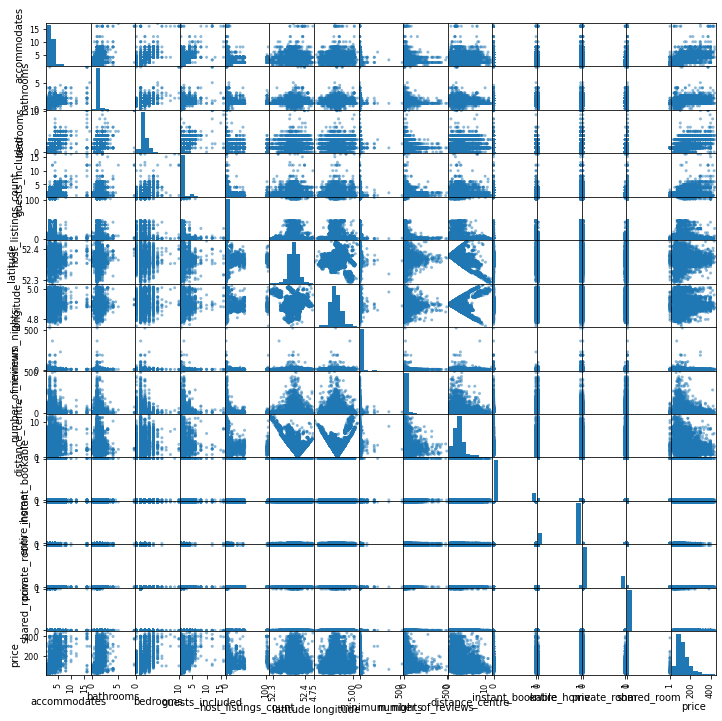

In [11]:
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist')

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

Vamos a ver los coeficientes de correlación de Pearson para ver qué variables están más relacionadas con el precio por noche del alquiler.

In [12]:
df.corr(method='pearson')['price']

accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
instant_bookable      -0.004410
entire_home            0.361313
private_room          -0.357184
shared_room           -0.042109
price                  1.000000
Name: price, dtype: float64

Vemos que variables como la posición exacta de la vivienda, así como la cantidad de reviews y demás variables que no tienen mucho que ver con las condiciones del piso y el alquiler no afectan mucho al precio. Por otro lado tiene sentido que factores como la distancia al centro, número de dormitorios, baños y gente a alojar, así como si se dispone del piso entero o simplemente una habitación de forma privada, afectan mucho más directa o inversamente al precio del alquiler.

In [13]:
#Quitamos las variables con una correlación en valor absoluto menor a 0.2
df2 = df.drop(['host_listings_count','latitude','longitude','minimum_nights','number_of_reviews','instant_bookable','shared_room'],axis=1)
df2

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

Puesto que hemos visto que en los problemas de redes neuronales, reesca, vamos a reescalar los datos para que el entrenamiento converja más rápido. En este caso vamos a estandarizar, puesto que la mayoría de las variables parece que siguen una distribución normal.

In [14]:
# Transformamos las variables de entrada
scaler_x = StandardScaler()
df_data = df2.drop(['price'],axis=1).values
scaler_x.fit(df_data)
data_scaled=scaler_x.transform(df_data)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
df_target = df2['price'].values
scaler_y.fit(df_target.reshape(-1, 1)) 
target_scaled=scaler_y.transform(df_target.reshape(-1, 1))

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [15]:
cv_scores_mean=[]
cv_scores_std=[]

regul_param_range = 10.0 ** -np.arange(1, 10) 
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.5004709059814816,
  -0.503032974094523,
  -0.5030737004402023,
  -0.5033974261266284,
  -0.5032888805460289,
  -0.5028274714496431,
  -0.5021661794066663,
  -0.5040873816612008,
  -0.5032317948618794],
 [0.020011291645910142,
  0.020412398577821424,
  0.020218480518442602,
  0.020197906910986444,
  0.020313141828480572,
  0.02029002324169659,
  0.021305380050854965,
  0.019620198412211173,
  0.020381661644668165])

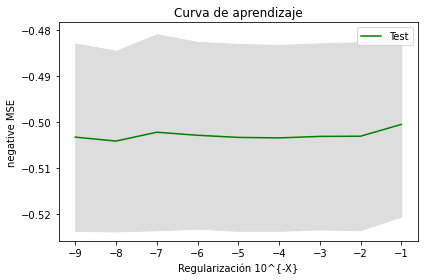

In [16]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Vemos que tenemos un comportamiento en general bastante estable, y que obtenemos el mejor valor para $\alpha=10^{-1}$.

In [17]:
cv_scores_mean2=[]
cv_scores_std2=[]

regul_param_range2 = 10.0 ** -np.arange(1, 10) 
for regul_param in regul_param_range2:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores2 = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean2.append(scores2.mean())
    cv_scores_std2.append(scores2.std())

cv_scores_mean2, cv_scores_std2

([-0.5067236404852893,
  -0.5219183058806456,
  -0.526677037647844,
  -0.5251014657575754,
  -0.5272928884360385,
  -0.5387628055334092,
  -0.5348731940044336,
  -0.5354526812782165,
  -0.5282181558837061],
 [0.020292156638834435,
  0.020960996184080195,
  0.018788541181208207,
  0.017999521877801367,
  0.021121729280414607,
  0.019624683357042937,
  0.02010015631454654,
  0.022677339549749067,
  0.024616887099219636])

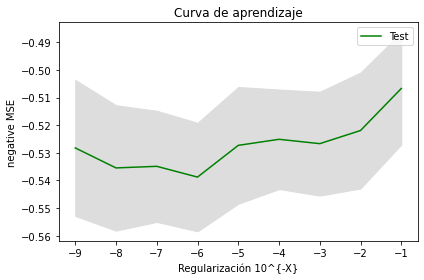

In [18]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range2), cv_scores_mean2, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean2) - np.array(cv_scores_std2)
upper_limit = np.array(cv_scores_mean2) + np.array(cv_scores_std2)
plt.fill_between(np.log10(regul_param_range2), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Esta es menos estable que la primera. Se ve que el mejor valor es también para $\alpha=10^{-1}$, y a partir de ahí más o menos el error va empeorando según disminuye el coeficiente de regularización.

Por último, vemos que la primera red neuronal domina a la segunda, puesto que para cualquier valor de $\alpha$, el error es siempre menor en la primera.

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

Emplearemos la primera red neuronal (una capa oculta de 200 neuronas con parámetro de regulación $\alpha=10^{-1}$, puesto que hemos visto en el anterior apartado que es la que nos da un error más pequeño.

In [19]:
# Creamos el clasificador
regul_param=0.1
mlp = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, data_scaled, target_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)

In [20]:
errors = np.abs(df_target - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df2['price'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 31.578306774674658
Desviación típica: 32.236224004465
Error medio en %: 24.28161506810944


Tenemos un error medio de algo más de 31€, que aunque a simple vista parezca poco, hay que recordar que el precio era por noche, y que la media era de 130€ más o menos, por lo que tenemos casi un error medio de un 25%, lo que es bastante elevado.

Por tanto el modelo no es muy bueno, ya que teniendo en cuenda que el rango de precios no es muy grande, un error de 31€ puede suponer mucha diferencia muy grande entre un piso y otro en alquiler por noche.

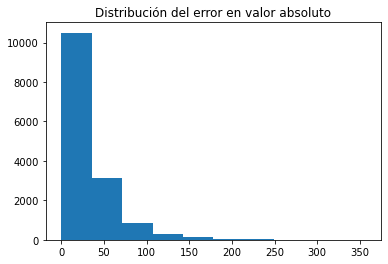

In [21]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

La mayor parte de los errores se concentran en la parte de la izquierda de la gráfica (vemos que la mayoría de los errores están entre 0 y 50 euros), aunque también tenemos errores bastante elevados a la derecha, ya que como hemos dicho, nuestro rango de valores es pequeño (el máximo era 440 y la media era de 130), por lo que tener errores superiores a 50, e incluso alguno superior a 150 es algo poco deseable.

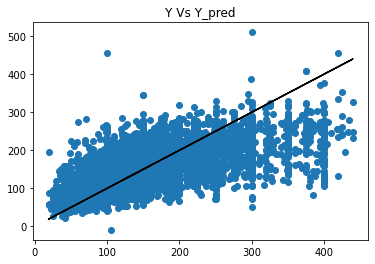

In [22]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df_target, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df_target, df_target, color='k') 

plt.title('Y Vs Y_pred')
plt.show()